In [3]:
import pandas as pd
from fbprophet import Prophet

In [31]:
df = pd.read_csv('../../data/prophet/example_wp_log_peyton_manning.csv')
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [32]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
future = m.make_future_dataframe(periods=100)
forcast = m.predict(future)

그리고 make_future_dataframe() 함수를 이용해 예측값을 넣을 데이터 프레임을 생성합니다. 이때, 인자로 들어가는 periods 값은 향후 몇일 (또는 주,월 등 단위 주기) 을 예측할 것인지를 의미합니다. 아래 코드에서 predict() 함수를 통해 향후 100일의 실적을 예측합니다.

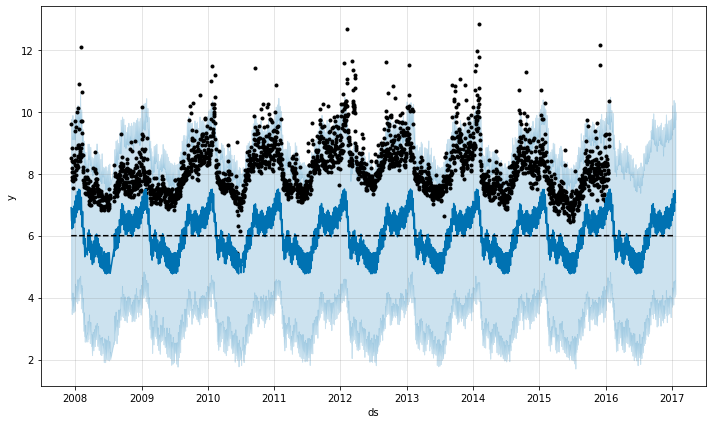

In [40]:
forcast_fig = m.plot(forecast)

파란색 선이 모델이 예측한 값이고, 검정색 점들이 실제 데이터 입니다. 파라미터를 설정해주지 않은 기본값으로도 패턴을 꽤 잘 잡아내고 있죠? 피팅된 모델의 컴포넌트들을 시각화해보면 아래와 같습니다.

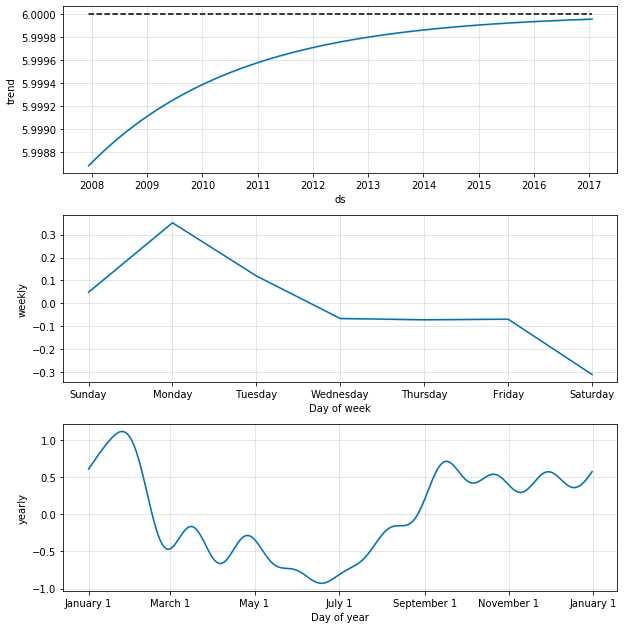

In [29]:
forcast_fig2 = m.plot_components(forecast)

위 결과로 나온 컴포넌트들을 하나하나 해석해봅시다. 먼저, Trend는 점점 증가하는 추세를 보입니다. 만약 모델이 데이터의 Trend를 잘 잡아내지 못하는 것 같다면, changepoint_prior_scale 파라미터값을 높여주어 changepoint를 더 민감하게 감지하도록 할 수 있습니다. 여기서 changepoint란, Trend가 변화하는 지점을 의미합니다.

그 아래 차트는 각각 ‘주 계절성’과 ‘연 계절성’을 의미합니다. 두번째 차트인 weekly 먼저 살펴보면, 금요일과 토요일에 가장 실적이 높게 나타나는 패턴을 보입니다. yearly 패턴으로는 5~6월에 실적이 급격하게 상승하는 모습을 보이네요. Trend와 마찬가지로 Seasonality또한 seasonality_prior_scale 파라미터로 모델 반영 강도를 조절할 수 있습니다.

# Trend
모델의 Trend를 조절할 수 있는 파라미터는 다음과 같습니다.

Parameter|Description
:---|:---
changepoints|트렌드 변화시점을 명시한 리스트값
changepoint_prior_scale	| changepoint| (trend) 의 유연성 조절
n_changepoints	|   changepoint 의 개수
changepoint_range	| changepoint 설정 가능 범위. (기본적으로 데이터 중 80% 범위 내에서 changepoint를 설정합니다.)


다음에서 모델의 changepoint 를 시각화해보고, changepoint_prior_scale 값 변경에 따른 Trend 변화를 살펴보겠습니다.

changepoint_prior_scale = 0.05 (default)

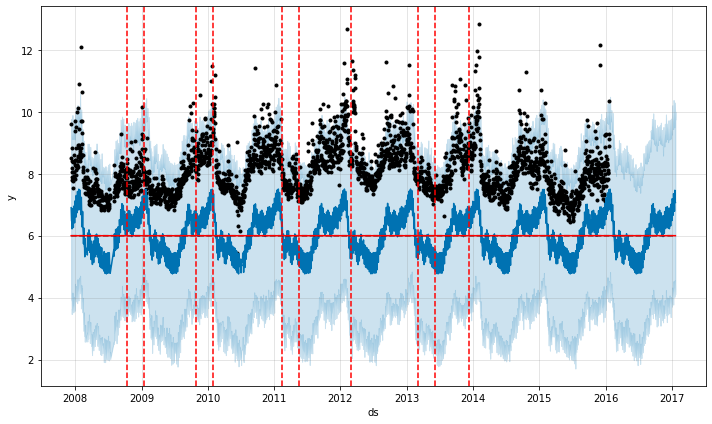

In [42]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),  m, forecast)

빨간 실선은 트렌드를 의미하며, 빨간 점선은 트렌드가 변화하는 changepoint 를 의미합니다. 빨간 실선인 트렌트만을 따로 그려봤을 때 결과는 아래와 같습니다.

In [9]:
df['cap'] = 6
df['floor'] = 1.5
df.head()

,ds,y,cap,floor
0,2007-12-10,9.590761,6,1.5
1,2007-12-11,8.519590,6,1.5
2,2007-12-12,8.183677,6,1.5
3,2007-12-13,8.072467,6,1.5
4,2007-12-14,7.893572,6,1.5


In [18]:
# Profit 생성, fit
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future = m.make_future_dataframe(periods=365)

future['cap'] = 6
future['floor'] = 1.5

forecast = m.predict(future)
forecast.tail()

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,5.999955,6,1.5,4.224372,9.989182,5.999955,5.999955,1.156022,1.156022,...,0.043395,0.043395,0.043395,1.112627,1.112627,1.112627,0.0,0.0,0.0,7.155977
3266,2017-01-16,5.999955,6,1.5,4.565131,10.299281,5.999955,5.999955,1.466360,1.466360,...,0.341568,0.341568,0.341568,1.124792,1.124792,1.124792,0.0,0.0,0.0,7.466316
3267,2017-01-17,5.999955,6,1.5,4.478190,10.088686,5.999955,5.999955,1.261587,1.261587,...,0.125882,0.125882,0.125882,1.135705,1.135705,1.135705,0.0,0.0,0.0,7.261542
3268,2017-01-18,5.999955,6,1.5,4.105008,9.744135,5.999955,5.999955,1.089253,1.089253,...,-0.056002,-0.056002,-0.056002,1.145254,1.145254,1.145254,0.0,0.0,0.0,7.089208
3269,2017-01-19,5.999955,6,1.5,4.289126,10.006864,5.999955,5.999955,1.071552,1.071552,...,-0.081741,-0.081741,-0.081741,1.153293,1.153293,1.153293,0.0,0.0,0.0,7.071508


In [24]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
3210,2016-11-21,6.778967,3.918028,9.401271
3211,2016-11-22,6.586205,3.834751,9.614628
3212,2016-11-23,6.426644,3.747514,9.282215
3213,2016-11-24,6.422167,3.593934,9.252208
3214,2016-11-25,6.463147,3.617984,9.368944
3215,2016-11-26,6.229078,3.507023,9.035295
3216,2016-11-27,6.600819,3.667178,9.515677
3217,2016-11-28,6.912393,4.239052,9.914100
3218,2016-11-29,6.707551,3.883494,9.687765
3219,2016-11-30,6.533870,3.731369,9.269846


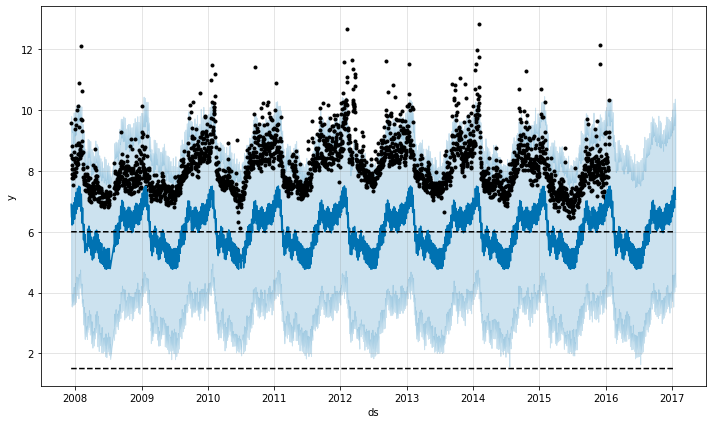

In [22]:
future = m.plot(forecast)

REF:   
https://hyperconnect.github.io/2020/03/09/prophet-package.html
https://gorakgarak.tistory.com/1255